In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression


In [5]:
df = pd.read_csv('/Automobile_data.csv')

In [6]:
df.tail(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [7]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [8]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style", "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type", "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower", "peak-rpm","city-mpg","highway-mpg","price"]

In [9]:
df.replace("?", np.NaN)
df.dropna(subset = ["price"], axis = 0)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [10]:
df.to_csv("automobile.csv", index = False)

In [11]:
data = pd.read_csv("automobile.csv")

In [12]:
data.replace("?",np.NaN, inplace=True)

In [13]:
data.isnull().sum()
for column in data.columns:
    print(column)
    print(data[column].isnull().sum())

symboling
0
normalized-losses
41
make
0
fuel-type
0
aspiration
0
num-of-doors
2
body-style
0
drive-wheels
0
engine-location
0
wheel-base
0
length
0
width
0
height
0
curb-weight
0
engine-type
0
num-of-cylinders
0
engine-size
0
fuel-system
0
bore
4
stroke
4
compression-ratio
0
horsepower
2
peak-rpm
2
city-mpg
0
highway-mpg
0
price
4


In [14]:
data.dropna(subset = ["price"], inplace = True, axis = 0)
data.reset_index(drop=True, inplace=True)

In [15]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [16]:
data["city-L/100km"] = 235/data["city-mpg"]

In [19]:
data["highway-L/100km"] = 253/data['highway-mpg']

In [20]:
data["length"] = data["length"]/data["length"].max()
data["height"] = data["height"]/data["height"].max()
data["width"] = data["width"]/data["width"].max()

In [21]:
data["horsepower"] = data["horsepower"].astype("float", copy=True)

Text(0.5, 1.0, 'Horsepower distribution')

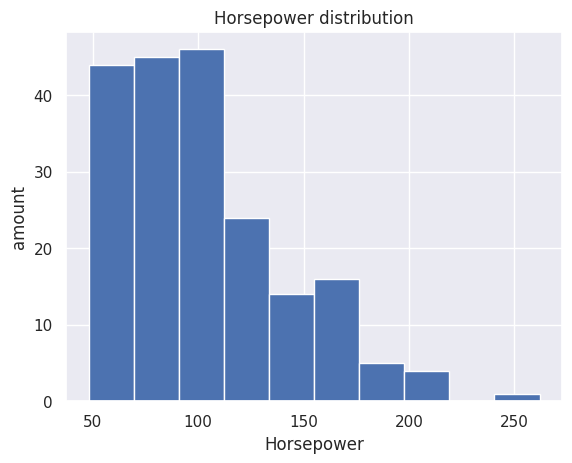

In [22]:
plt.hist(data["horsepower"])

plt.xlabel("Horsepower")
plt.ylabel("amount")
plt.title("Horsepower distribution")

In [23]:
features = ["wheel-base", "length", "curb-weight","engine-size"]

X = df.copy()
y = X.pop('price')
X = X.loc[:, features]


X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [24]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,-1.012841,1.166604,-0.802813,0.014246
1,-1.012841,1.166604,-0.802813,0.014246
2,0.088347,1.020922,-0.277750,0.229489
3,-0.230205,-0.557560,-0.018678,-0.263970
4,0.532961,0.133712,-0.151231,0.206949


In [25]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=component_names,
    index=X.columns,
)
loadings

,PC1,PC2,PC3,PC4
wheel-base,0.485537,-0.585469,0.639563,0.111532
length,0.518841,-0.300562,-0.571296,-0.560435
curb-weight,0.528226,0.193005,-0.354598,0.746985
engine-size,0.464795,0.727762,0.372613,-0.339834


In [26]:
def plot_variance(pca, width=8, dpi=100):
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)

    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )

    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )

    fig.set(figwidth=8, dpi=100)
    return axs

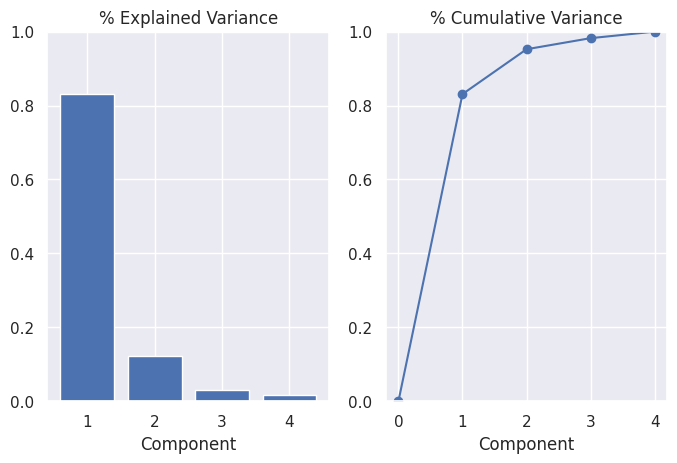

In [27]:
plot_variance(pca);